# Problem Definition 
In this project we will investigate the [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance) dataset from [Kaggle](https://www.kaggle.com/mirichoi0218/insurance). The dataset was originally drawn from the Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. The attributes are defined as follows(taken from Kaggle) 

- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
- objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.-
- charges: Individual medical costs billed by health insurance

## Goals 
- Predict the insurance costs

In [1]:
# packages for exploratory data analysis 
import pandas as pd 
import numpy as np 
import researchpy as rp 

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('whitegrid')
sns.set(font_scale=1)
plt.rcParams['figure.figsize'] = 6,3
plt.rcParams['figure.dpi'] = 300 
plt.rcParams['figure.edgecolor'] = 'black'
plt.rcParams['font.family'] = 'serif'

## Exploring Data 

In [2]:
df = pd.read_csv('../data/insurance.csv')
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# shape 
df.shape 

(1338, 7)

In [4]:
# Let's look at the data types of each attributes 
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

We can see the numeric attributes are age, bmi, children, and charges, the categorical attributes are sex, smoker, and region. 

In [5]:
# info 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Let's analyze numeric attributes 
df_num = df.select_dtypes(exclude=['object'])
df_num.head() 

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [7]:
# summary statistics 
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
# summary statistics with CI 
rp.summary_cont(df_num)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,age,1338.0,39.2070,14.0500,0.3841,38.4535,39.9605
1,bmi,1338.0,30.6634,6.0982,0.1667,30.3363,30.9904
2,children,1338.0,1.0949,1.2055,0.0330,1.0303,1.1596
3,charges,1338.0,13270.4223,12110.0112,331.0675,12620.9540,13919.8905


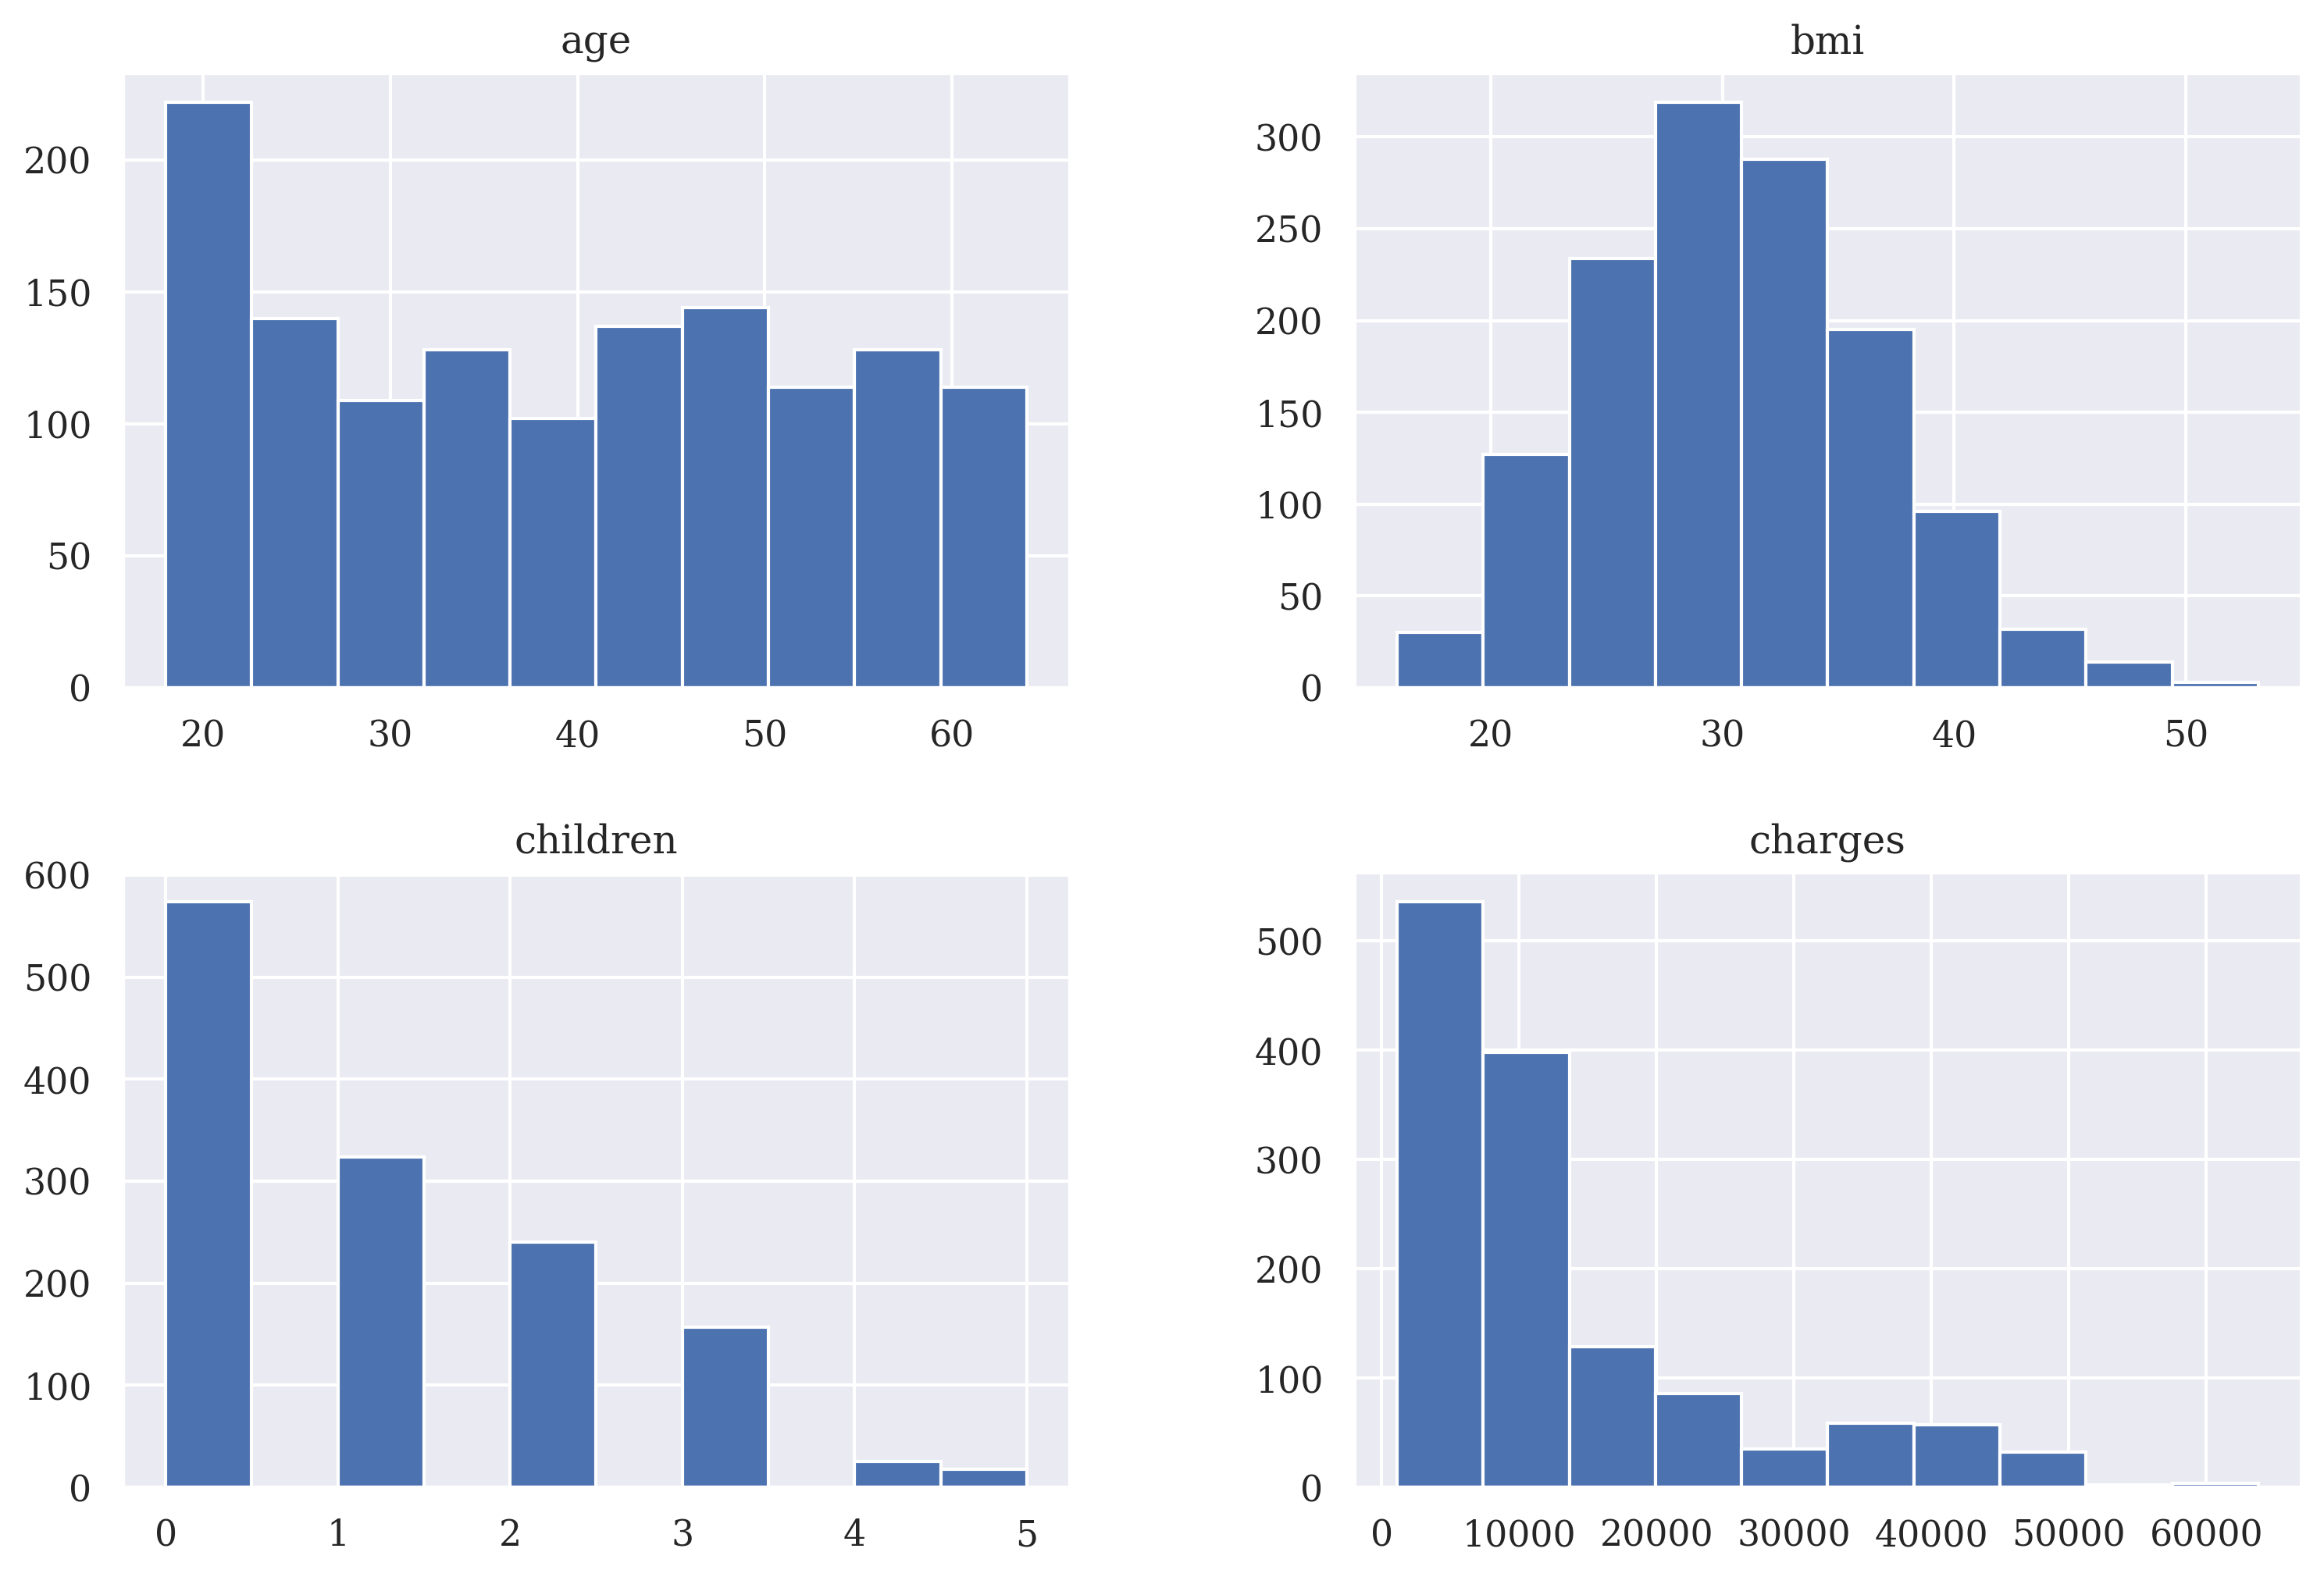

In [15]:
# histograms 
df_num.hist(sharex=False, sharey=False,figsize=(12,8))
plt.show() 

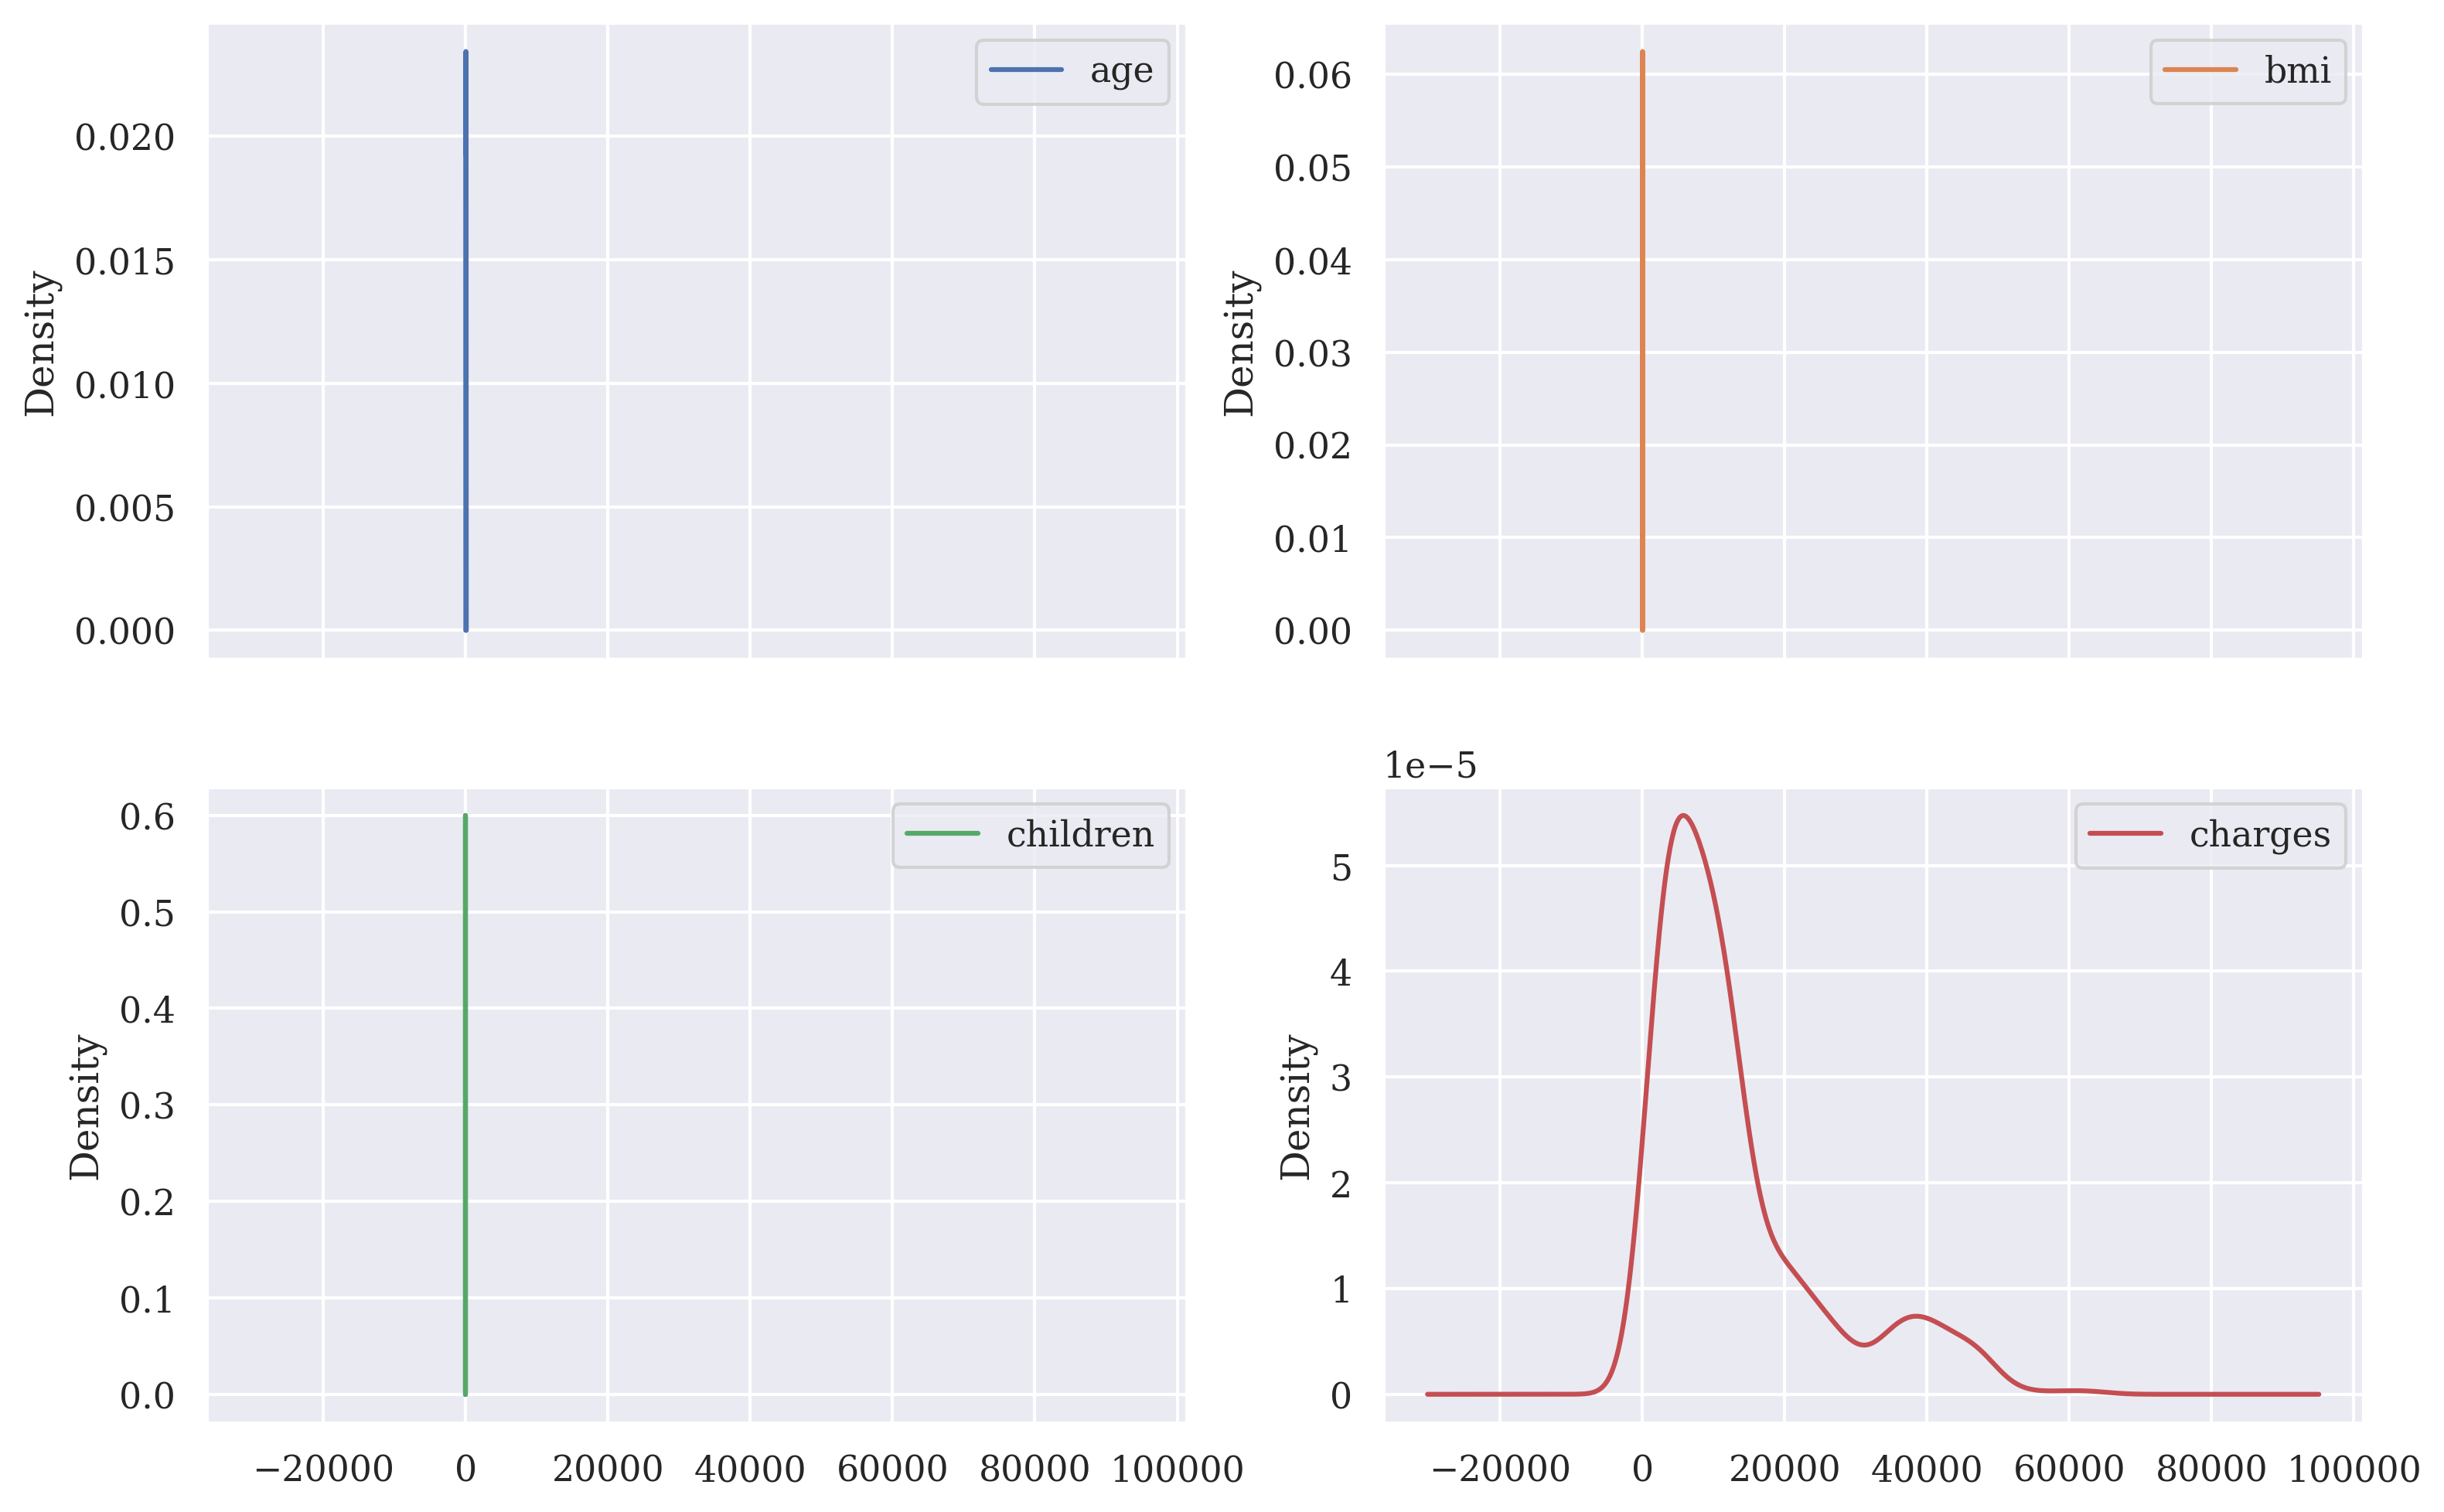

In [16]:
# density plot 
df_num.plot(kind='density',figsize=(12,8), subplots=True, layout=(2,2))
plt.show() 

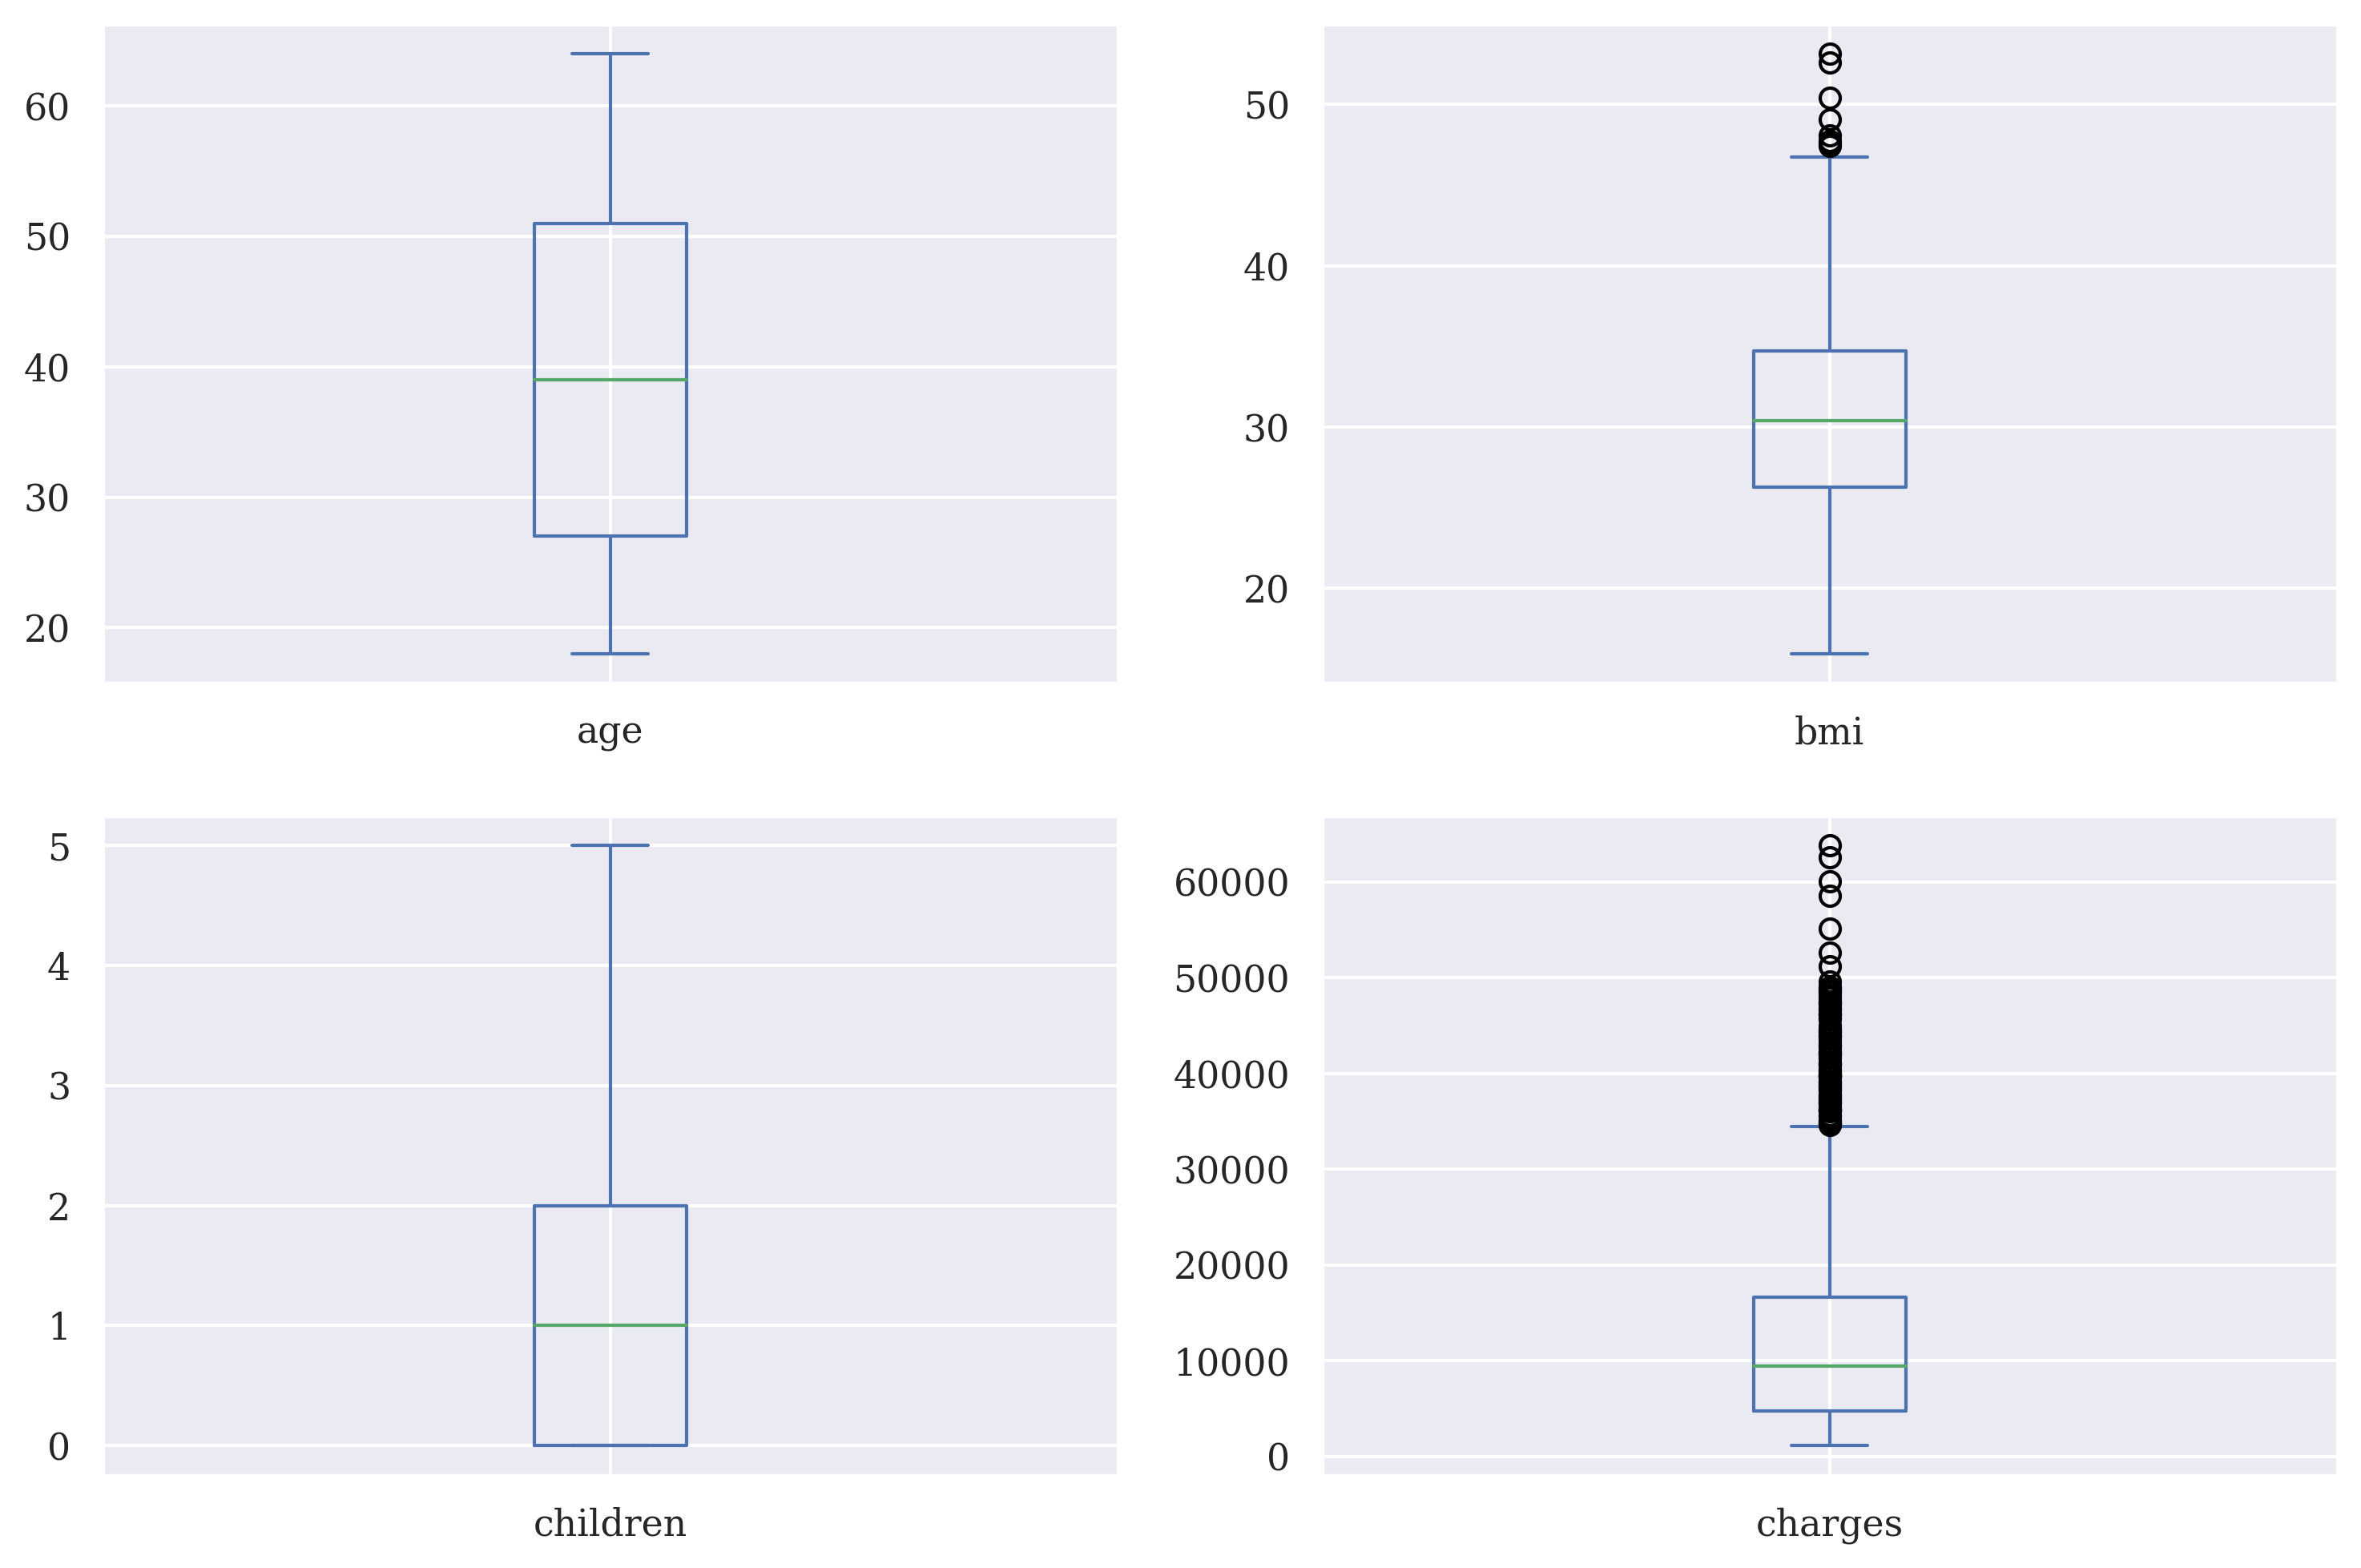

In [17]:
# box plots 
df_num.plot(kind='box',figsize=(12,8), subplots=True, layout=(2,2))
plt.show() 

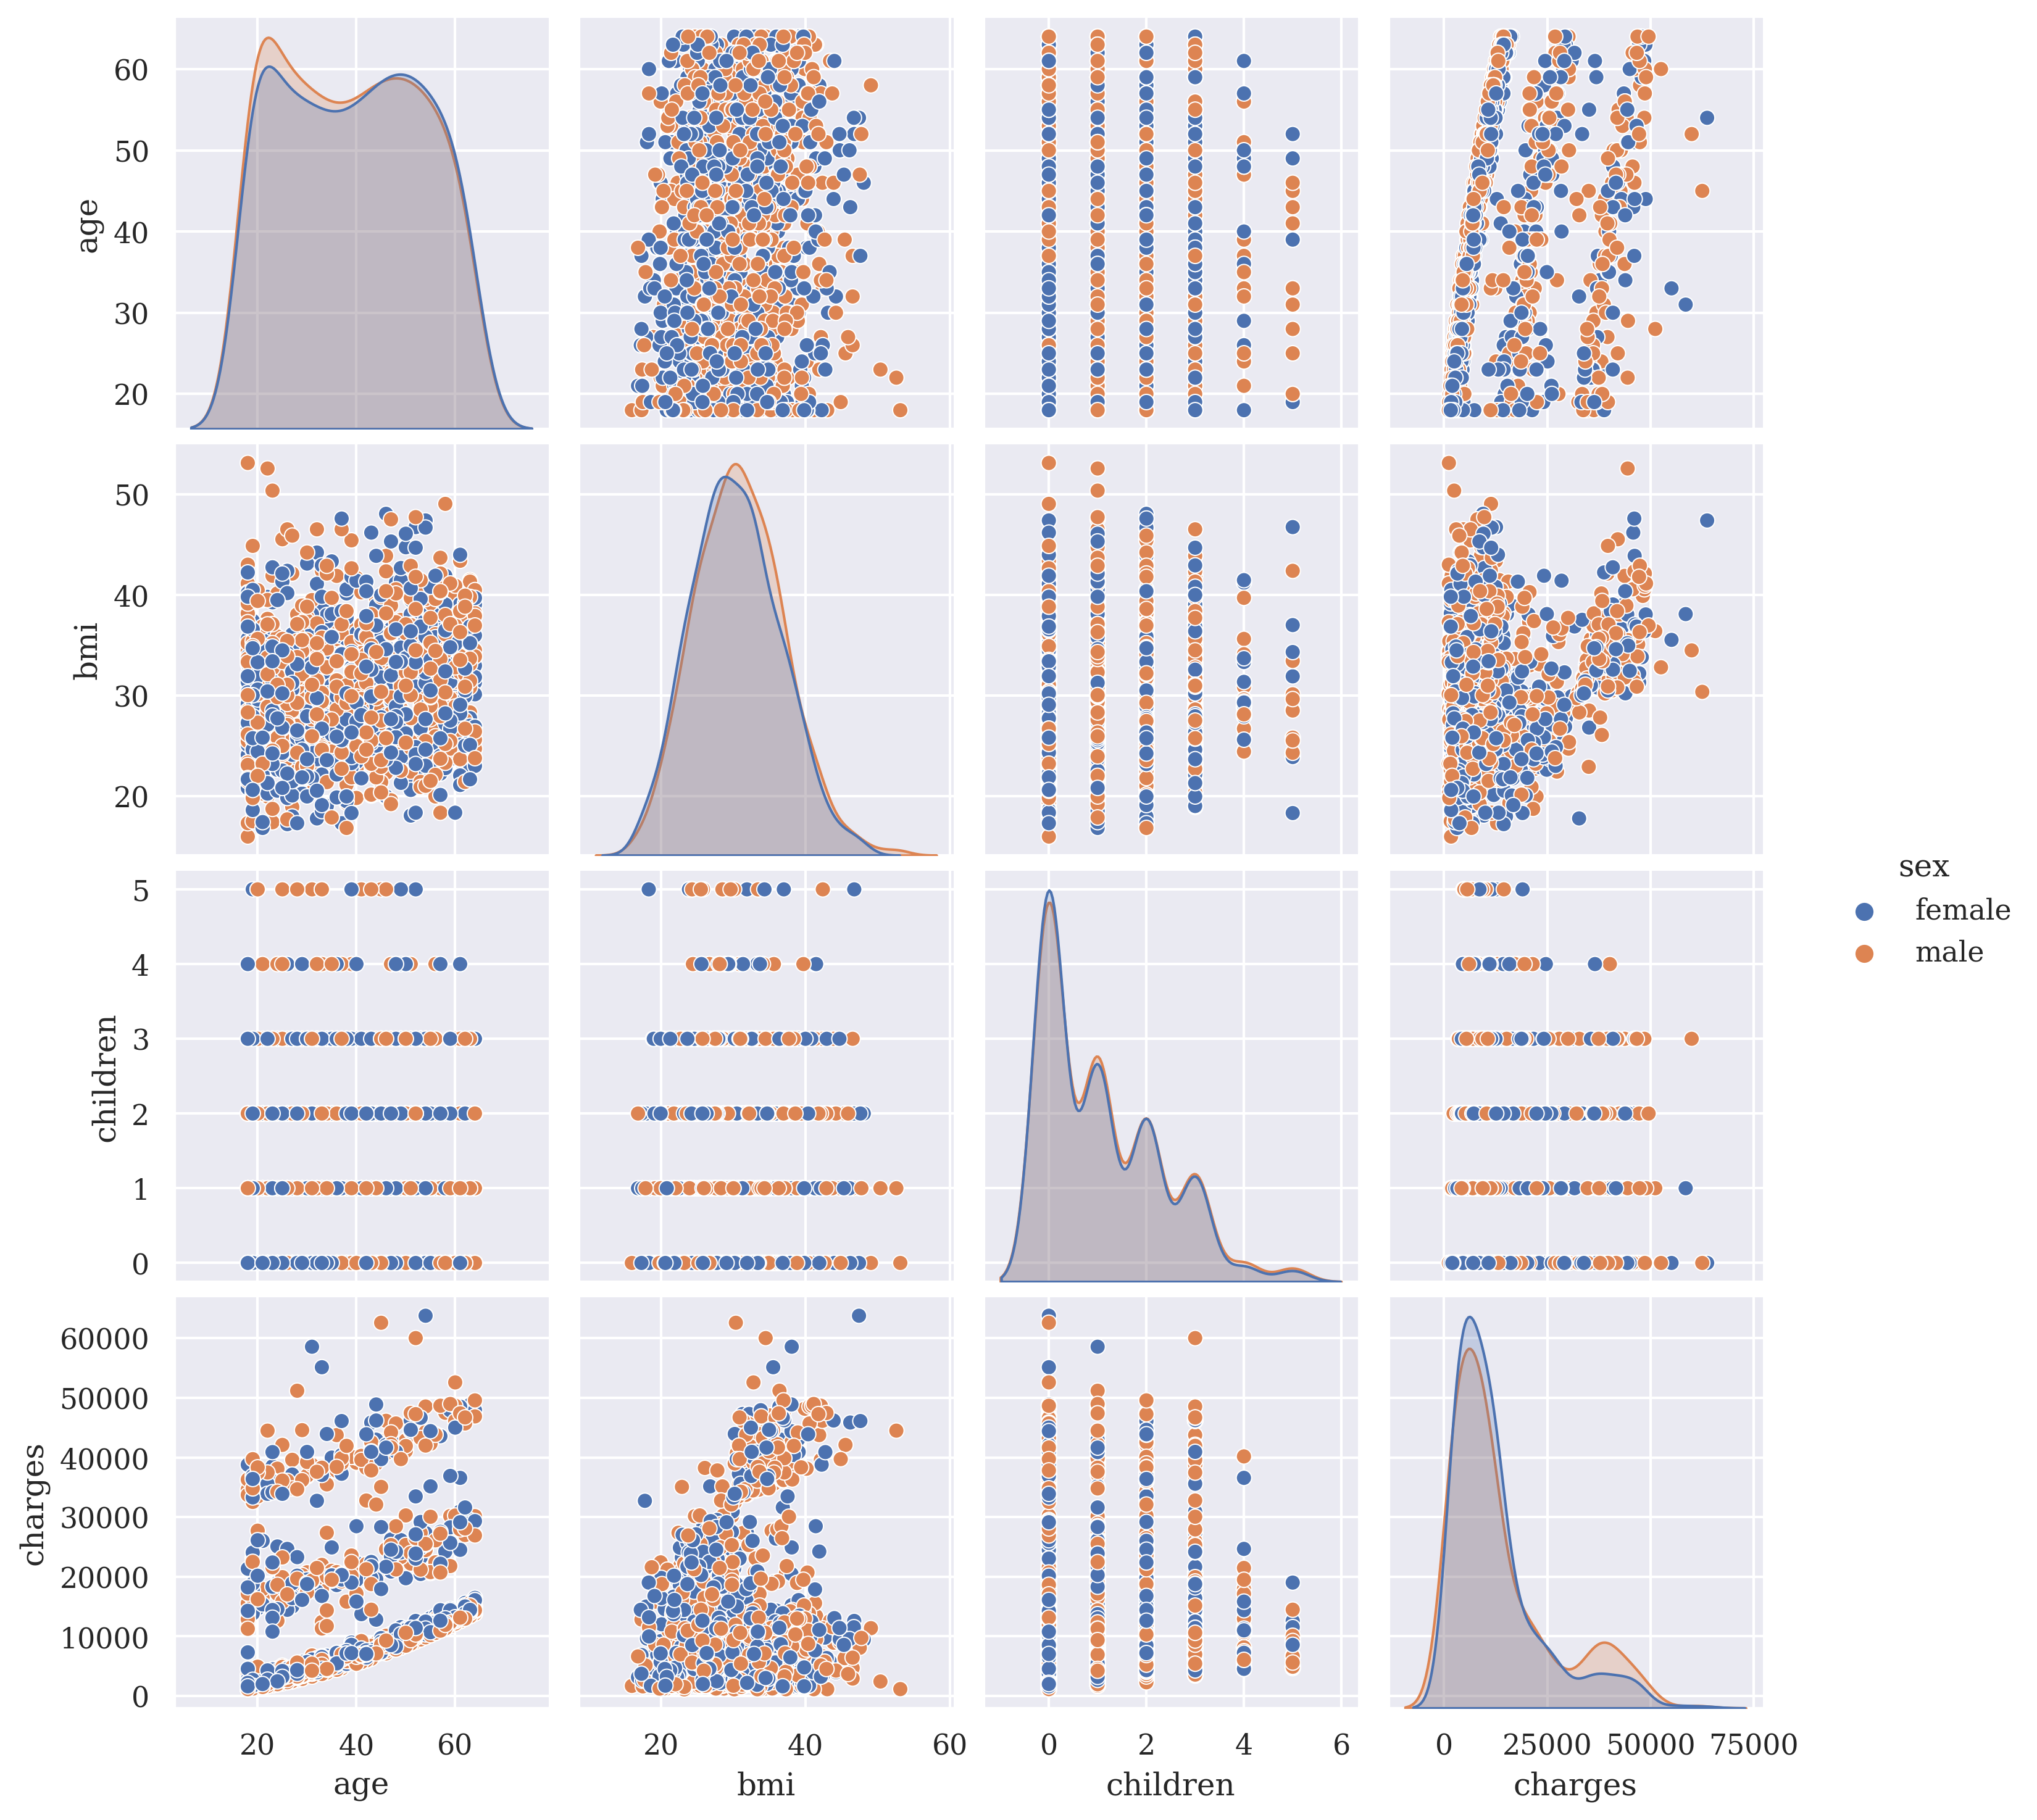

In [23]:
sns.pairplot(df, hue='sex')
plt.show()

In [24]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [34]:
# Correlation between variables 
rp.corr_pair(df_num)

,r value,p-value,N
age & bmi,0.1093,0.0001,1338
age & children,0.0425,0.1205,1338
age & charges,0.2990,0.0000,1338
bmi & children,0.0128,0.6410,1338
bmi & charges,0.1983,0.0000,1338
children & charges,0.0680,0.0129,1338


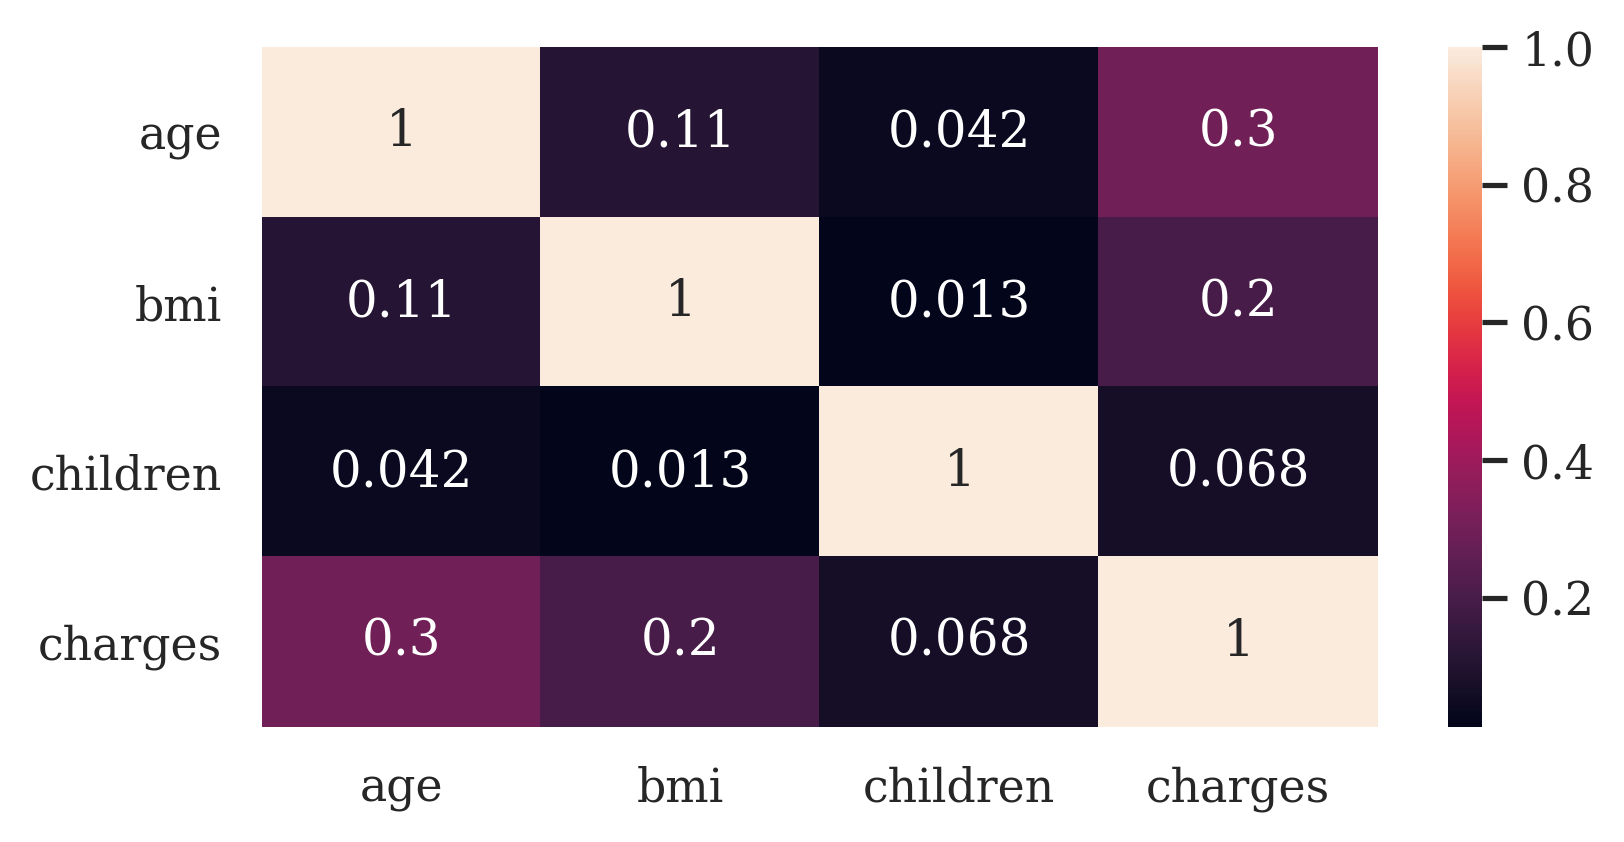

In [32]:
# correlation
sns.heatmap(df.corr(), annot=True)
plt.show()

In [37]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head() 

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [38]:
rp.summary_cat(df_cat)

,Variable,Outcome,Count,Percent
0,sex,male,676,50.52
1,,female,662,49.48
2,smoker,no,1064,79.52
3,,yes,274,20.48
4,region,southeast,364,27.20
5,,southwest,325,24.29
6,,northwest,325,24.29
7,,northeast,324,24.22


## Preprocessing Data for Building Model 

In [ ]:
from sklearn.model_selection import train_test_split
